# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# change working diretory
# import os
# os.chdir("/content/gdrive/MyDrive/Dissertation/")

Mounted at /content/gdrive


In [2]:
!ls runs/detect
# %cd drive/MyDrive/Dissertation

ls: cannot access 'runs/detect': No such file or directory


Make sure GPU work fine.

In [3]:
!nvidia-smi

Sat Aug  5 23:55:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Make sure we are in the right working directory.

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8.

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.4/166.8 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

# Train on the original dataset

## Download the original dataset

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("apple-detection-tg6vd")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format


Extracting Dataset Version Zip to Apple-Detection-1 in yolov8:: 100%|██████████| 2014/2014 [00:00<00:00, 2888.48it/s]


## Train the model

The training ends at 188th epoch as no improvement.

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=400 imgsz=720 plots=True  # 300

# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/ori_best.pt data={dataset.location}/data.yaml epochs=400 imgsz=720 plots=True  # 300



/content
100% 21.5M/21.5M [00:00<00:00, 244MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Apple-Detection-1/data.yaml, epochs=400, patience=50, batch=16, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

In [9]:
!ls {HOME}/runs/detect/train/  # check the model is prodeced

args.yaml					    train_batch0.jpg
events.out.tfevents.1691280074.ac0a3c57f6f0.2233.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [10]:
%cp {HOME}/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/results.png /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


cp: cannot stat '/content/runs/detect/train/confusion_matrix.png': No such file or directory
cp: cannot stat '/content/runs/detect/train/val_batch0_pred.jpg': No such file or directory


/content


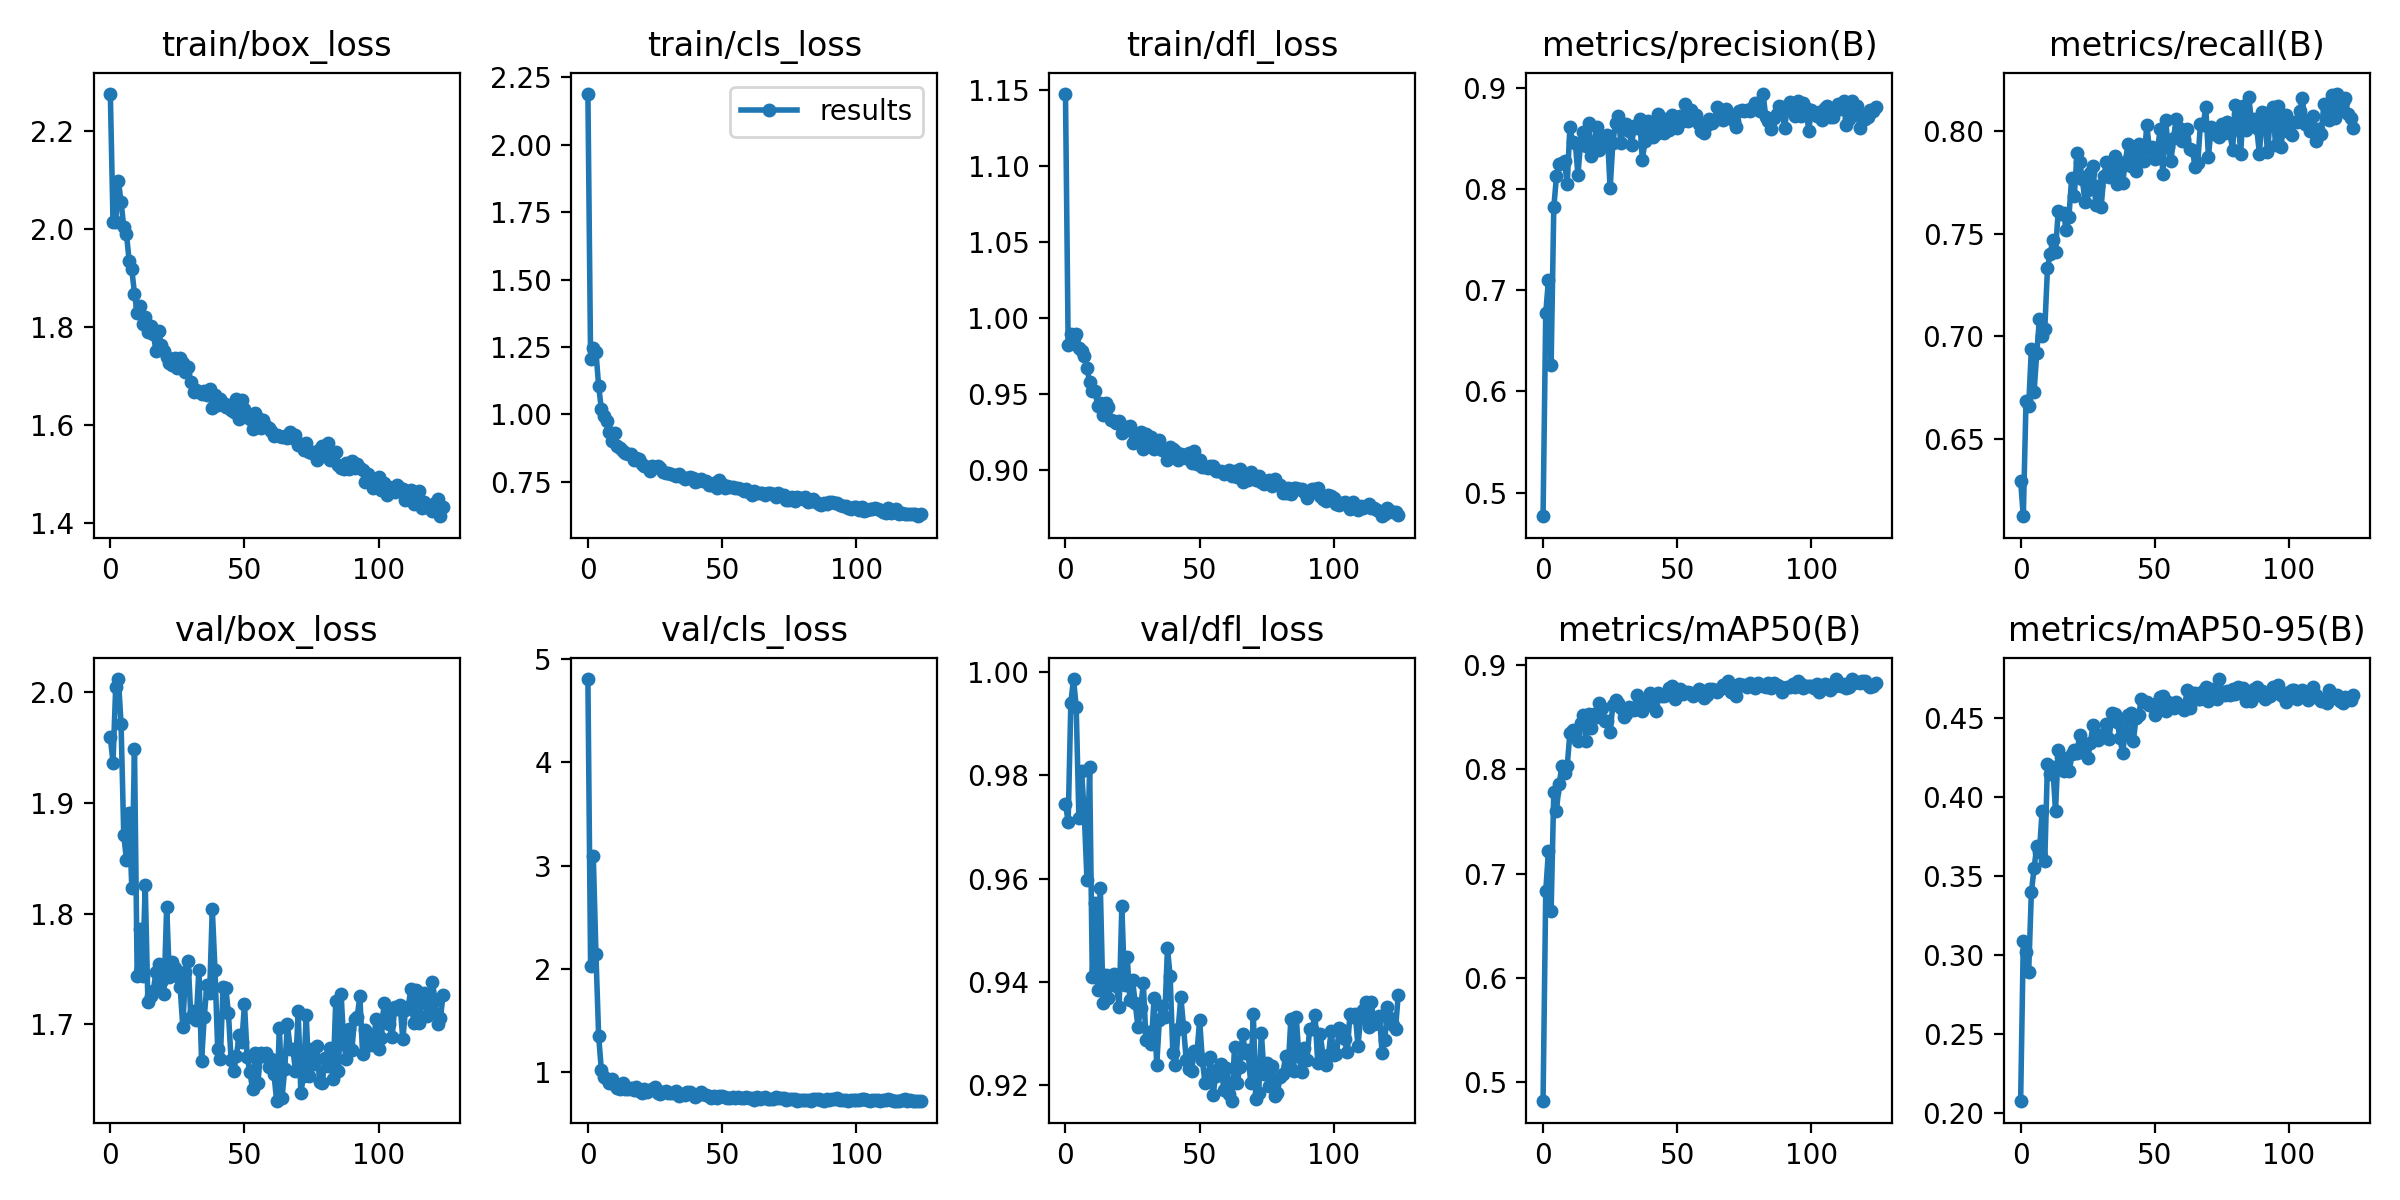

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)

## Validate the Model

The performance on the validation set is close to that on the training set. It seems there is no overfitting, and the model converge well.

In [12]:
%cd {HOME}

# !yolo task=detect mode=val model={HOME}/gdrive/My\ Drive/Dissertation/Models/aug_best.pt data={dataset.location}/data.yaml

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-06 01:12:00.599445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 01:12:01.462658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Apple-Detection-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:20<00:00,  2.89s/it]
                   all        100       4015      0.878      0.796      0.881      0.476
Speed: 1.6ms pre-process, 12.6ms i

## Inference with the Model

### Produce detection results

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True

/content
2023-08-06 01:12:30.861354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 01:12:31.729416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/331 /content/datasets/Apple-Detection-1/test/images/dataset1_back_1021_png_jpg.rf.5ff430b5abbb15aa0c0587ff8954a406.jpg: 736x416 52 apples, 60.5ms
image 2/331 /content/datasets/Apple-Detection-1/test/images/dataset1_back_1051_png_jpg.rf.19122b37f93157594710fc636048f555.jpg: 736x416 59 apples, 13.7ms
image 3/331 /content/datasets/Apple-Detection-1/test/images/dataset1_back_1081_

**NOTE:** Let's take a look at few results.

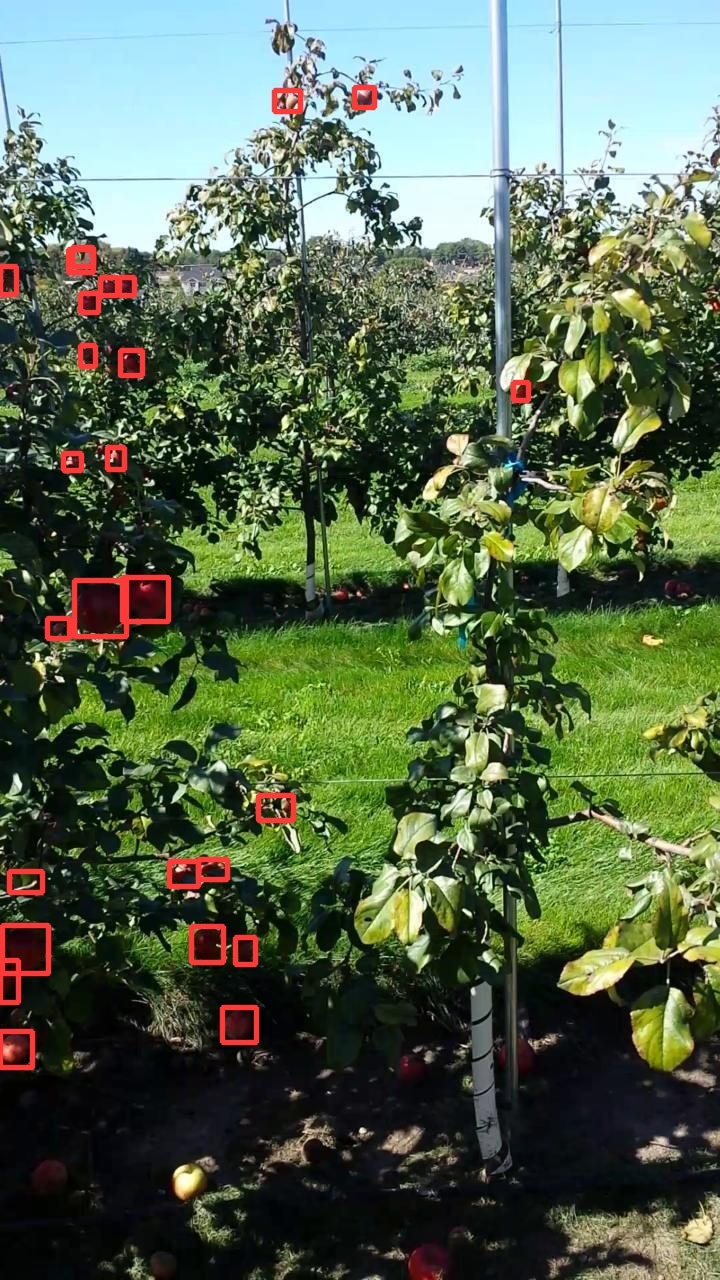

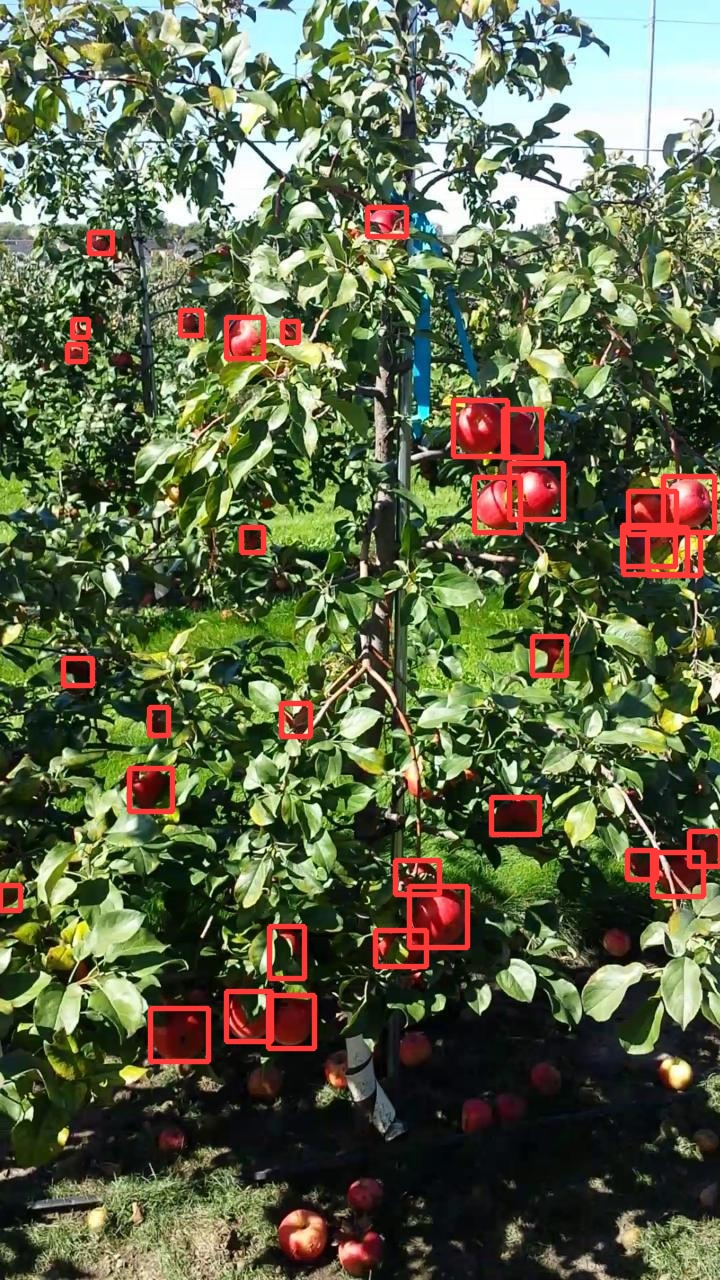

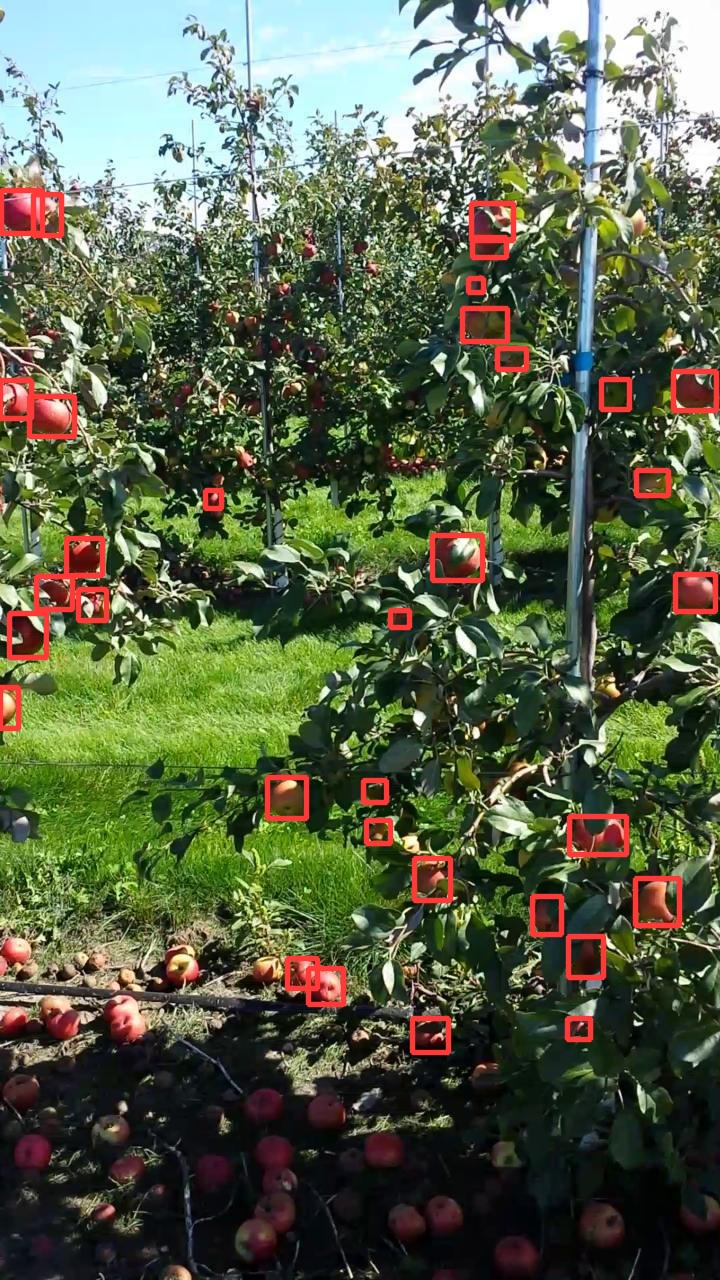

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

### Evaluate the model on test set
Produce the performance of the model on the test set.

All other metrics are much higher than the training and validating reaults

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data_test.yaml

/content
2023-08-06 01:12:57.502172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 01:12:58.358332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Apple-Detection-1/test/labels... 331 images, 0 backgrounds, 0 corrupt: 100% 331/331 [00:00<00:00, 1447.49it/s]
val: New cache created: /content/datasets/Apple-Detection-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:28<00:00,  1.33s/it]
                   all        331      1